--------------------1st order-----------------
Model: Exponential Fit -- MSE:640.127, MAE:18.877,RMSE:25.301, R^2:0.058
Residuals: 252      53.785573
143      20.849212
261     326.883012
415     112.383187
73       69.988388
          ...     
198    1020.810806
424    1024.456370
308    1024.456370
369    1619.247139
231    1024.456370
Length: 450, dtype: float64
640.1273328263985 25.3007377921356 18.877056663894027 0.05785250245035123
--------------------2nd order-----------------
Model: Polynomial Fit -- MSE:637.606, MAE:18.979,RMSE:25.251, R^2:0.062
Residuals: 252     107.407618
143      36.664614
261     823.754933
415       0.000405
73      360.511152
          ...     
198     411.015993
424     388.091686
308     371.604141
369    2807.320018
231     361.569729
Length: 450, dtype: float64
637.6063008168227 25.250867328011186 18.978773808963517 0.061562989219564934
--------------------3rd order-----------------
Model: Logarithmic Fit -- MSE:657.146, MAE:19.207,RMSE:25.635, R^2:

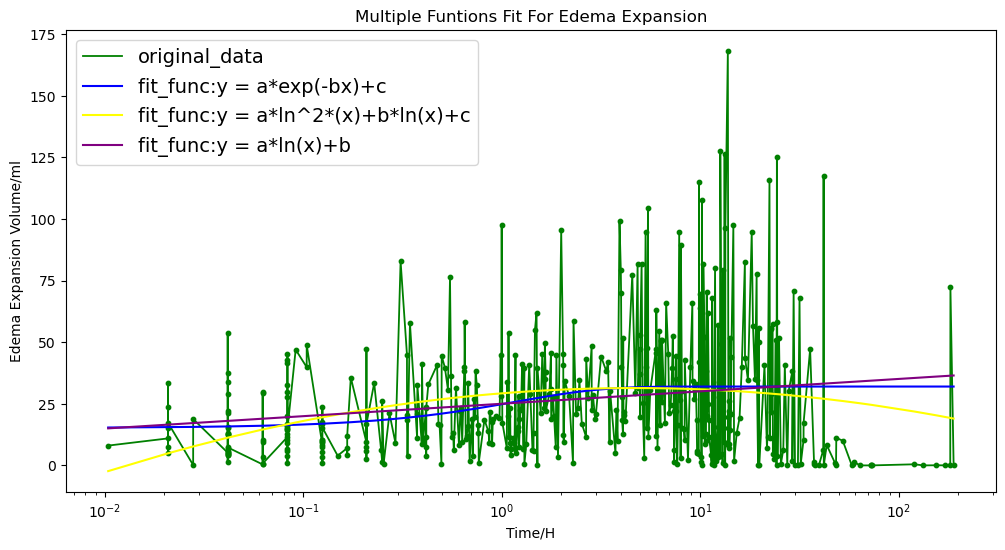

252    0.010417
143    0.020833
261    0.020833
415    0.020833
73     0.020833
Name: x, dtype: float64

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def func_1st(x, a, b, c):
    return a * np.exp(-b * x) + c

def func_2nd(x, a, b, c):
    x_log = np.log(x)
    return a * x_log**2 + b * x_log + c

def func_3rd(x, a, b):
    return a * np.log(x) + b
    
def func_4th(x):
    coefficients = [19.09524, 3.56933, -0.20442, 0.00412, -3.9182E-5, 1.76868E-7, -3.04404E-10]
    return coefficients[0] + coefficients[1]*x + coefficients[2]*x**2 + coefficients[3]*x**3 + coefficients[4]*x**4 + coefficients[5]*x**5 + coefficients[6]*x**6
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"Model: {model_name} -- MSE:{mse:.3f}, MAE:{mae:.3f},RMSE:{rmse:.3f}, R^2:{r2:.3f}")
    return mse, rmse, mae, r2

# 读取包含空值的文件
data = pd.read_excel(r"./data/process/tmp.xlsx")

# 数据清洗，删除包含空值的样本
data_cleaned = data.dropna()

# 分离特征和目标变量
x = data_cleaned['x']
y = data_cleaned['y']

# 将数据按照x坐标排序
sorted_indices = np.argsort(x)
sorted_x = x.iloc[sorted_indices]
sorted_y = y.iloc[sorted_indices]

plt.figure(figsize=(12, 6))
# 绘制散点图
plt.scatter(x, y, color='green', s=10)

# 绘制折线图
plt.plot(sorted_x, sorted_y, color='green', linewidth=1.3, label='original_data')

xdata = sorted_x
ydata = sorted_y

print("--------------------1st order-----------------")
popt, pcov = curve_fit(func_1st, xdata, ydata)
y_pred = func_1st(xdata, *popt)
mse, rmse, mae, r2 = evaluate_model(ydata, y_pred, 'Exponential Fit')
residuals = (ydata - y_pred)**2
print("Residuals:", residuals)
print(mse,rmse,mae,r2)
plt.plot(xdata, func_1st(xdata, *popt), label='fit_func:y = a*exp(-bx)+c', color='blue')

print("--------------------2nd order-----------------")
popt, pcov = curve_fit(func_2nd, xdata, ydata)
y_pred = func_2nd(xdata, *popt)
mse, rmse, mae, r2 = evaluate_model(ydata, y_pred, 'Polynomial Fit')
residuals = (ydata - y_pred)**2
print("Residuals:", residuals)
print(mse,rmse,mae,r2)
plt.plot(xdata, func_2nd(xdata, *popt), label='fit_func:y = a*ln^2*(x)+b*ln(x)+c', color='yellow')

print("--------------------3rd order-----------------")
popt, pcov = curve_fit(func_3rd, xdata, ydata)
y_pred = func_3rd(xdata, *popt)
mse, rmse, mae, r2 = evaluate_model(ydata, y_pred, 'Logarithmic Fit')
residuals = (ydata - y_pred)**2
print("Residuals:", residuals)
print(mse,rmse,mae,r2)
plt.plot(xdata, func_3rd(xdata, *popt), label='fit_func:y = a*ln(x)+b', color='purple')

# 添加标题和标签
plt.title('Multiple Funtions Fit For Edema Expansion')
# plt.title('Edema Expansion Change With Time')
plt.xlabel('Time/H')
plt.ylabel('Edema Expansion Volume/ml')
plt.legend(fontsize=14)
plt.gca().set_xscale('log')
# 显示图形
plt.show()

xdata.head()

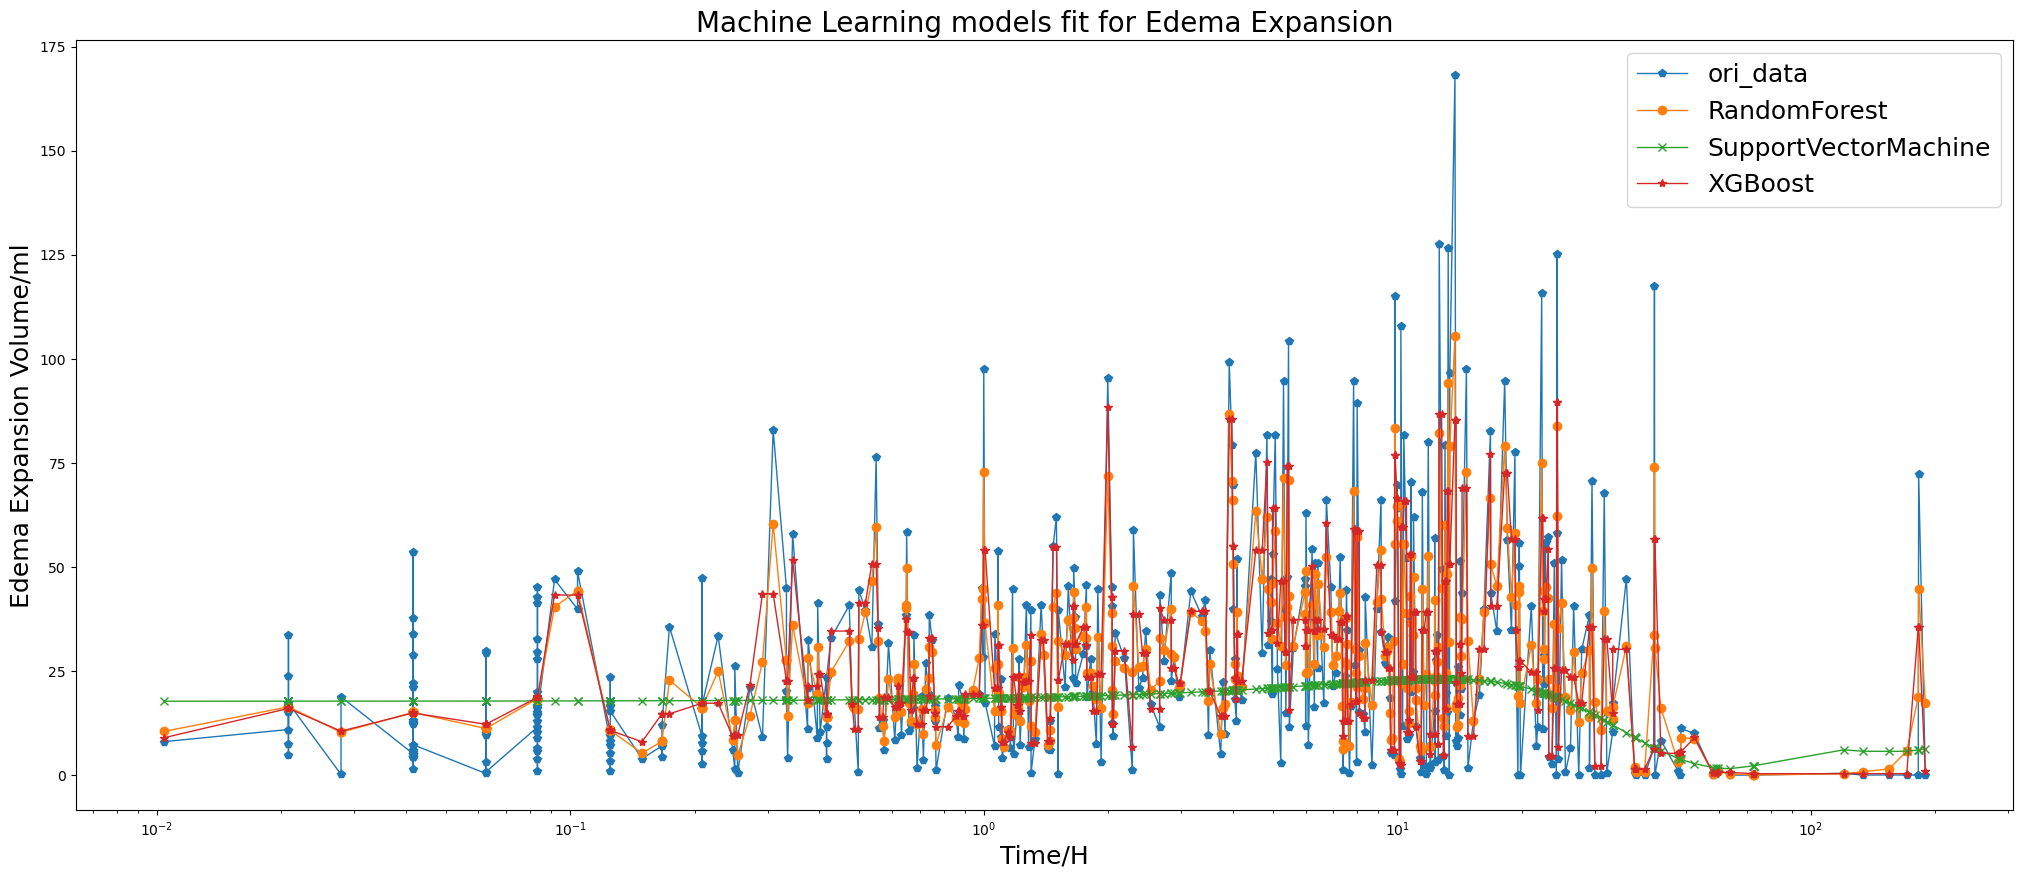

In [2]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))


xdata = sorted_x.to_numpy()
ydata = sorted_y.to_numpy()

# RandomForest
RF_model = RandomForestRegressor(n_estimators=100, random_state=0)
RF_model.fit(xdata.reshape(-1, 1), ydata)
RF_pred = RF_model.predict(xdata.reshape(-1,1))


# SupportVectorMachine
SVM_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
SVM_model.fit(xdata.reshape(-1, 1), ydata)
SVM_pred = SVM_model.predict(xdata.reshape(-1,1))

# Xgboost
XGB_model = xgb.XGBRegressor() 
XGB_model.fit(xdata.reshape(-1,1),ydata)
XGB_pred = XGB_model.predict(xdata.reshape(-1,1))

plt.plot(xdata,ydata,linewidth=1,marker='p',label='ori_data')
plt.plot(xdata,RF_pred,linewidth=1,marker='o',label='RandomForest')
plt.plot(xdata,SVM_pred,linewidth=1,marker='x',label='SupportVectorMachine')
plt.plot(xdata,XGB_pred,linewidth=1,marker='*',label="XGBoost")

plt.legend(fontsize=18)
plt.gca().set_xscale('log')

plt.xlabel("Time/H",fontsize=18)
plt.ylabel("Edema Expansion Volume/ml",fontsize=18)
plt.title("Machine Learning models fit for Edema Expansion",fontsize=20)

plt.show()

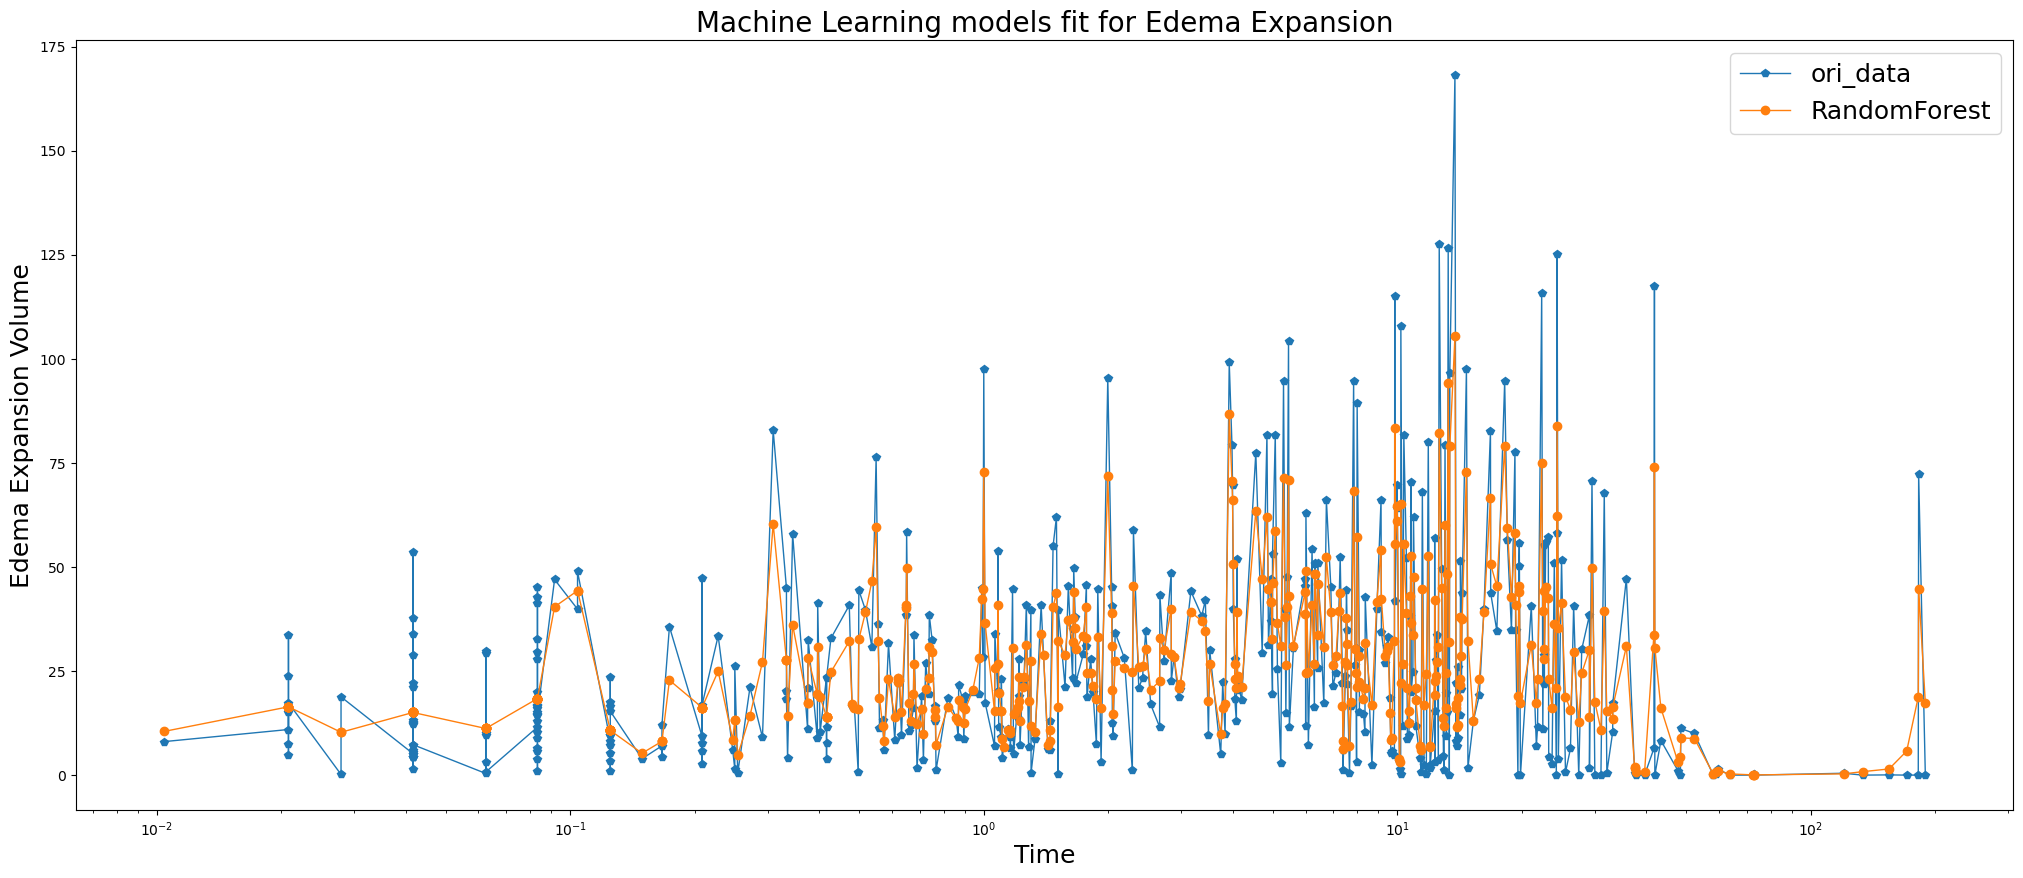

In [3]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))

xdata = (sorted_x).to_numpy()
ydata = (sorted_y).to_numpy()

# RandomForest
RF_model = RandomForestRegressor(n_estimators=100, random_state=0)
RF_model.fit(xdata.reshape(-1, 1), ydata)
RF_pred = RF_model.predict(xdata.reshape(-1,1))

# 计算Random Forest模型的MAE、MSE、RMSE和R²
RF_MAE = mean_absolute_error(ydata, RF_pred)
RF_MSE = mean_squared_error(ydata, RF_pred)
RF_RMSE = np.sqrt(RF_MSE)
RF_R2 = r2_score(ydata, RF_pred)

# # Support Vector Machine
# SVM_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
# SVM_model.fit(xdata.reshape(-1, 1), ydata)
# SVM_pred = SVM_model.predict(xdata.reshape(-1,1))

# # 计算Support Vector Machine模型的MAE、MSE、RMSE和R²
# SVM_MAE = mean_absolute_error(ydata, SVM_pred)
# SVM_MSE = mean_squared_error(ydata, SVM_pred)
# SVM_RMSE = np.sqrt(SVM_MSE)
# SVM_R2 = r2_score(ydata, SVM_pred)

# # Xgboost
# XGB_model = xgb.XGBRegressor() 
# XGB_model.fit(xdata.reshape(-1,1),ydata)
# XGB_pred = XGB_model.predict(xdata.reshape(-1,1))

# # 计算XGBoost模型的MAE、MSE、RMSE和R²
# XGB_MAE = mean_absolute_error(ydata, XGB_pred)
# XGB_MSE = mean_squared_error(ydata, XGB_pred)
# XGB_RMSE = np.sqrt(XGB_MSE)
# XGB_R2 = r2_score(ydata, XGB_pred)

plt.plot(xdata,ydata,linewidth=1,marker='p',label='ori_data')
plt.plot(xdata,RF_pred,linewidth=1,marker='o',label='RandomForest')
# plt.plot(xdata,SVM_pred,linewidth=1,marker='x',label='SupportVectorMachine')
# plt.plot(xdata,XGB_pred,linewidth=1,marker='*',label="XGBoost")

plt.legend(fontsize=18)
plt.gca().set_xscale('log')

plt.xlabel("Time",fontsize=18)
plt.ylabel("Edema Expansion Volume",fontsize=18)
plt.title("Machine Learning models fit for Edema Expansion",fontsize=20)

plt.show()

In [10]:
#------------------------------------------------时序性趋势预测
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def linear_func(x,a,b):
    return a*x+b

change = np.array

data = pd.read_excel(r"./data/process/Q2C.xlsx")
x = [1,2,3,4,5,6,7,8]
for i in range(100):
    tmp = np.array(data.iloc[:,i])
    tmp_cleaned = tmp[~np.isnan(tmp)]
    x_tmp = x[:len(tmp_cleaned)]

    popt,pcov = curve_fit(linear_func,x_tmp,tmp_cleaned)
    if popt[0]>0:
        change = np.append(change, 1)
    elif popt[0]<=0:
        change = np.append(change, 0)
print(change)
# ------------------------------------------------卡方验证
import numpy as np
import pandas as pd
data = pd.read_excel(r"D:\workplace\Adobe\AC\破事\正在做\样例参考\Q2C_data.xlsx")
data = data.iloc[:,1:]
X = data.iloc[:,:8]

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
from scipy.stats import f_oneway
for i in range(data.shape[1]-1):
    contingency_table = pd.crosstab(data.iloc[:,i], data.iloc[:,-1])
    _, p_val, _, _ = chi2_contingency(contingency_table)
    print("p-values:",p_val)
#-----------------------------------------------相关性分析
corr = X.corr()
# 绘制相关性图
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.xticks(rotation = 0,fontsize = 15)
plt.yticks(rotation = 0,fontsize = 15)
plt.show()
# #-----------------------------------------------Logistics回归模型
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
# from sklearn.ensemble import RandomForestClassifier
# import pandas as pd
# data = pd.read_excel(r"D:\workplace\Adobe\AC\破事\正在做\样例参考\Q2C_data.xlsx")
# data = data.iloc[:,1:]
# X = data.iloc[:,1:-1]
# y = data.iloc[:,-1]
# import warnings
# from sklearn.linear_model import LogisticRegression
# warnings.filterwarnings("ignore")

# for i in range(100):
#     # 创建 Logistic回归模型并拟合数据
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=i)
#     # 创建 Logistic回归模型并拟合数据
#     model = RandomForestClassifier()
#     model.fit(X_train, y_train)
#     # 在测试集上进行预测
#     y_pred = model.predict(X_test)
#     # 计算准确率和混淆矩阵
#     acc = accuracy_score(y_test, y_pred)
#     cm = confusion_matrix(y_test, y_pred)
#     pre = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 =f1_score(y_test, y_pred)
    
#     print(cm,acc,pre,recall,f1,i)
#     # print(cm,i)

# sns.heatmap(cm, annot=True, fmt='d', cmap='cool', cbar=False)
# plt.show()

ValueError: operands could not be broadcast together with shapes (8,) (450,) 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 读取数据
data = pd.read_excel(r"./data/process/Q2d.xlsx")
data.columns = (['x','y'])

# 将数据除以1000，将单位转换为千克
x = data['x']/1000
y = data['y']/1000

# 绘制散点图
plt.figure(figsize=(5,4),dpi=80)
plt.scatter(x, y, color='b', s=3)
plt.xlabel("HM_volume ")
plt.ylabel("ED_volume ")

# 进行线性拟合
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope*x + intercept, color='r', label='Linear Fit')

# 计算残差
residuals = y - (slope*x + intercept)

plt.legend()
plt.show()

print("斜率 (slope):", slope)
print("截距 (intercept):", intercept)
print("相关系数 (r_value):", r_value)
print("p 值 (p_value):", p_value)
print("标准误差 (std_err):", std_err)


ValueError: Length mismatch: Expected axis has 8 elements, new values have 2 elements